In [5]:
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

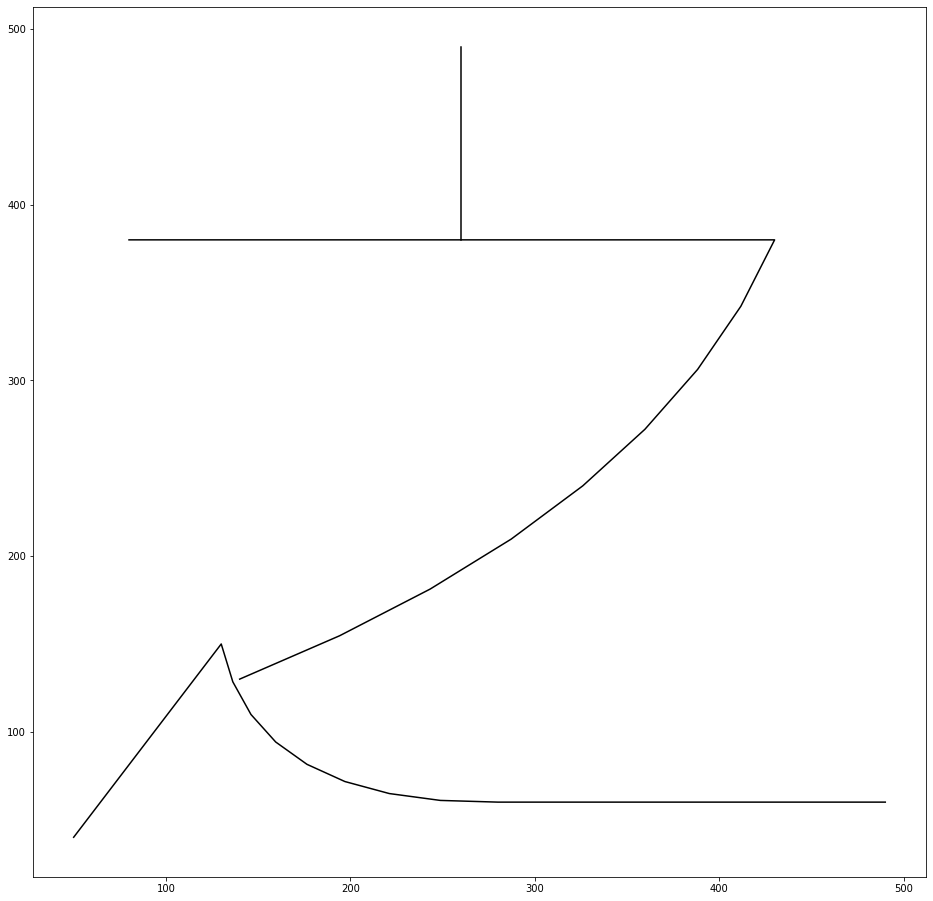

In [6]:
character = "4E4B";
file = "../hans/" + character[0] + "000/" + character + ".han" #lookup the file
fileTree = ET.parse(file).getroot()
namespace = '{http://biologicinstitute.org/schemas/stylus/1.0}'
#print(fileTree.getroot().attrib)

fig, ax = plt.subplots(figsize=(16,16))
#ax.axis("off")

for stroke in fileTree.find(namespace + 'strokes'):
    points = stroke.find(namespace+'points').find(namespace+'forward')
    pointData = [[],[]] #[xPoints, yPoints]
    for point in points:
        x = float(point.attrib['x'])
        y = float(point.attrib['y'])
        frac = float(point.attrib['fractionalDistance'])
        pointData[0].append(x)
        pointData[1].append(y)
    ax.plot(pointData[0], pointData[1], color="black")

## Reading files from
https://github.com/chanind/hanzi-writer

https://chanind.github.io/hanzi-writer-data/#20263

In [7]:
import json
def readHanziChar(character):
    fileName = '../Data/Hanzi Data/' + character + '.json'
    with open(fileName, 'r') as f:
        charData = json.load(f)
    return charData
        
character = '\u4f4d' #'\u4f55'
print(character)
charData = readHanziChar(character)
print(charData)


位
{'strokes': ['M 246 516 Q 285 571 327 643 Q 352 695 377 720 Q 387 732 381 746 Q 377 759 345 783 Q 317 802 296 801 Q 275 798 285 775 Q 330 685 66 345 Q 56 335 54 327 Q 50 315 65 318 Q 105 327 204 460 Q 213 472 222 483 L 246 516 Z', 'M 222 483 Q 246 423 246 366 Q 246 234 222 135 Q 212 90 246 39 Q 247 39 249 36 Q 267 20 279 47 Q 294 87 293 134 Q 290 374 297 428 Q 304 455 295 466 Q 253 511 246 516 C 224 536 211 511 222 483 Z', 'M 564 749 Q 595 724 629 693 Q 645 678 663 680 Q 675 681 680 696 Q 684 714 674 747 Q 667 769 631 784 Q 549 812 532 803 Q 526 799 529 784 Q 533 771 564 749 Z', 'M 435 546 Q 395 539 424 520 Q 469 493 534 508 Q 651 533 771 559 Q 826 572 835 580 Q 845 589 840 599 Q 831 612 798 620 Q 774 626 653 588 Q 541 558 435 546 Z', 'M 449 374 Q 480 292 510 262 Q 522 255 536 262 Q 546 272 549 288 Q 552 337 479 400 Q 476 403 475 404 Q 462 414 452 415 Q 446 416 444 404 Q 441 392 449 374 Z', 'M 656 178 Q 740 370 771 414 Q 778 423 764 443 Q 739 471 717 483 Q 704 492 694 486 Q 684 482 6

In [8]:
print(charData['strokes'])
print(len(charData['strokes']))
print(charData['medians'])
print(len(charData['medians']))

print("\n", charData['strokes'][1])
print(charData['medians'][1])

['M 246 516 Q 285 571 327 643 Q 352 695 377 720 Q 387 732 381 746 Q 377 759 345 783 Q 317 802 296 801 Q 275 798 285 775 Q 330 685 66 345 Q 56 335 54 327 Q 50 315 65 318 Q 105 327 204 460 Q 213 472 222 483 L 246 516 Z', 'M 222 483 Q 246 423 246 366 Q 246 234 222 135 Q 212 90 246 39 Q 247 39 249 36 Q 267 20 279 47 Q 294 87 293 134 Q 290 374 297 428 Q 304 455 295 466 Q 253 511 246 516 C 224 536 211 511 222 483 Z', 'M 564 749 Q 595 724 629 693 Q 645 678 663 680 Q 675 681 680 696 Q 684 714 674 747 Q 667 769 631 784 Q 549 812 532 803 Q 526 799 529 784 Q 533 771 564 749 Z', 'M 435 546 Q 395 539 424 520 Q 469 493 534 508 Q 651 533 771 559 Q 826 572 835 580 Q 845 589 840 599 Q 831 612 798 620 Q 774 626 653 588 Q 541 558 435 546 Z', 'M 449 374 Q 480 292 510 262 Q 522 255 536 262 Q 546 272 549 288 Q 552 337 479 400 Q 476 403 475 404 Q 462 414 452 415 Q 446 416 444 404 Q 441 392 449 374 Z', 'M 656 178 Q 740 370 771 414 Q 778 423 764 443 Q 739 471 717 483 Q 704 492 694 486 Q 684 482 687 466 Q 696 4

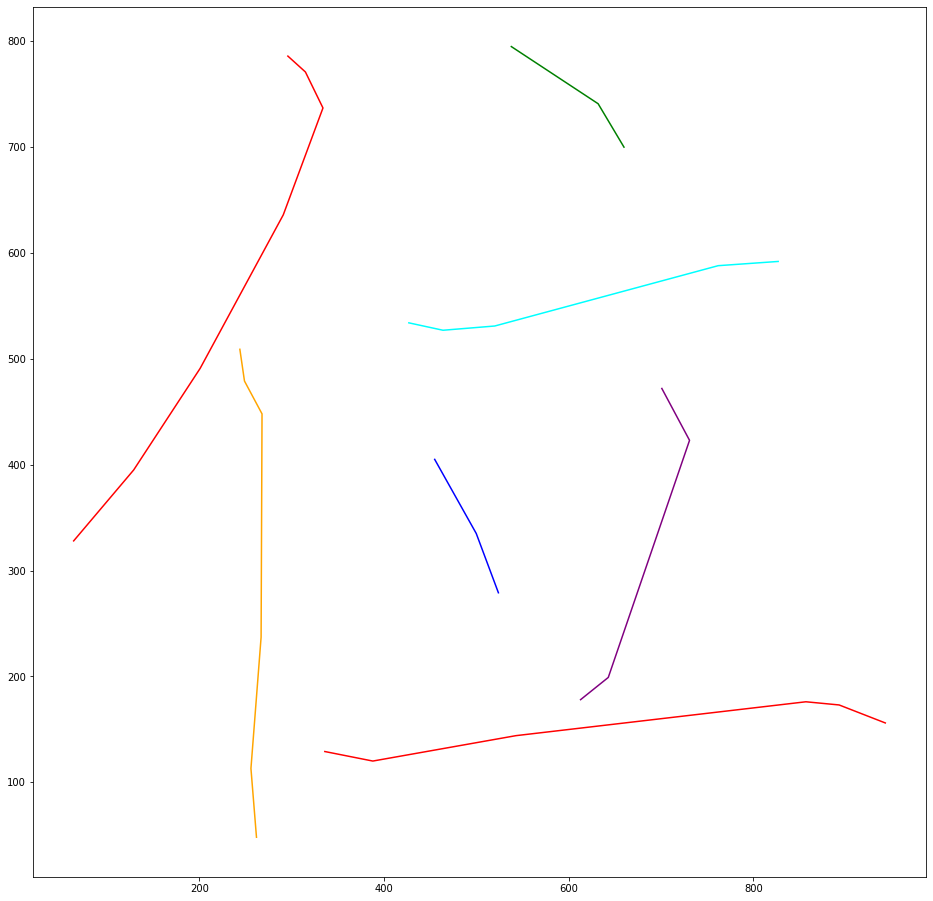

In [9]:
def plotHanziChar(charData):
    colors=["red","orange","green","cyan","blue","purple"]
    i = 0
    fig, ax = plt.subplots(figsize=(16,16))
    for stroke in charData['medians']:
        pointData = [[],[]] #[xPoints, yPoints]
        for point in stroke:
            pointData[0].append(point[0])
            pointData[1].append(point[1])
        ax.plot(pointData[0], pointData[1], color=colors[i%len(colors)])
        i=i+1 #for color
        
    return fig, ax
        
fig, ax = plotHanziChar(charData)

## Determining "manual" stroke type
https://en.wikipedia.org/wiki/Stroke_(CJK_character) (bottom of page)
Figure out which of the 36 matches the final curve

This requires each of the 36 curves to have a general form, that we can manipulate depending on the bounding box for the actual stroke.

I have done a couple below:

Let a stroke definition be a list of bezier curves, where each bezier curve is defined by the control points (x,y).

In [10]:
def plotStroke(stroke):
    fig, ax = plt.subplots(figsize=(8,8))
    
    evalPoints = np.linspace(0.0, 1.0, 100) #start, end, resol, parametric t values
    for st in stroke: #control points, 
        #graph actual curve (bezier, use package)
        nodes = np.array(st).transpose()
        curve = bezier.Curve(nodes, degree=len(st)-1)
        curvePoints = np.array( curve.evaluate_multi(evalPoints).transpose().tolist()) #[[x,y]...]
        ax.plot(curvePoints[:,0], curvePoints[:,1], color="black")
        
    return fig, ax, curvePoints

㇀


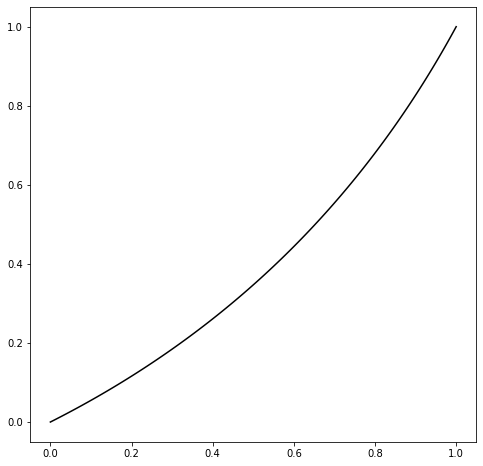

In [11]:
import bezier
charC0 = "\u31C0"
print(charC0)

#stroke0 = np.array([[161, 539], [471, 419], [638, 183]], dtype='float')
#stroke0[:,0] = stroke0[:,0] - 161
#stroke0[:,1] = stroke0[:,1] - 183
#print(stroke0)
#stroke0[:,0] = stroke0[:,0]/477.0
#stroke0[:,1] = stroke0[:,1]/356.0
#print(stroke0)
strokeC0 = [[[0,0], [0.64989518, 0.33707865], [1, 1]]]
fig, ax, curvePoints = plotStroke(strokeC0)

㇁


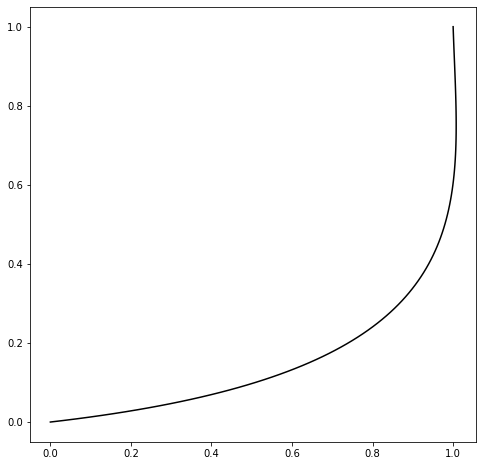

In [13]:
charC1 = "\u31C1"
print(charC1)
strokeC1 = [[[0, 0], [1.09574468, 0.12790698], [1.01595745, 0.50581395],[1, 1]]]
fig, ax, curvePoints = plotStroke(strokeC1)

㇄


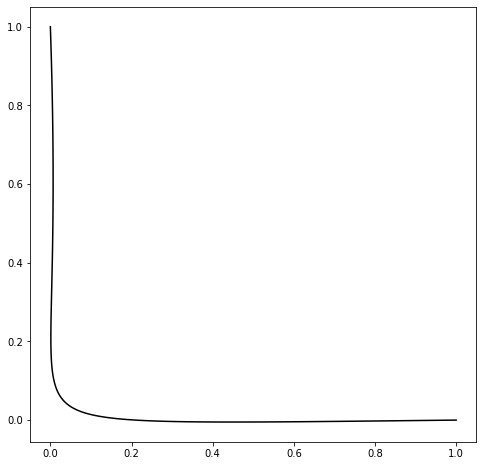

In [14]:
charC4 = "\u31C4"
print(charC4)
strokeC4 = [[ [0,1],[ 0.02970297, 0.08925319],[-0.03920792,0.03096539],[-0.01980198,-0.01371585],
       [0.0990099,-0.01025137],[1,0] ]]

fig, ax, curvePoints = plotStroke(strokeC4)

㇐


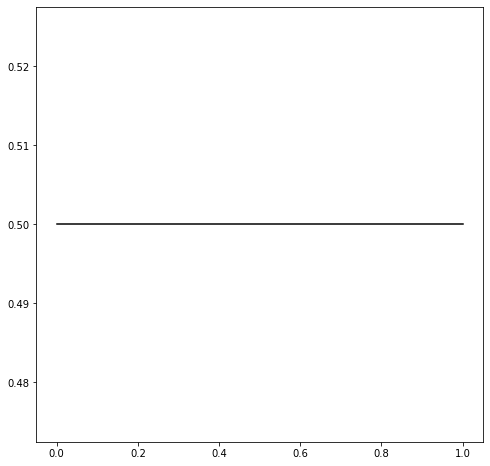

In [15]:
charD0 = "\u31D0"
print(charD0)
strokeD0 = [[[0,.5], [1, .5]]]
fig, ax, curvePoints = plotStroke(strokeD0)

㇑


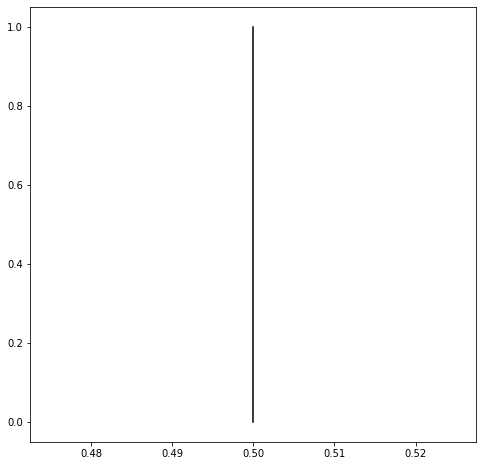

In [16]:
charD1 = "\u31D1"
print(charD1)
strokeD1 = [[[.5,1], [.5, 0]]]
fig, ax, curvePoints = plotStroke(strokeD1)

## Now develop an algorithm to determine how well a stroke type fits a "manual" stroke

For every point on the handwritten stroke, find the nearest point on the formal stroke, sum all of these distances.

For every point on the formal stroke, find the nearest point on the handwritten stroke, sum all of these distances.

Sum both of these results, this is the total error.

Note we can't check "every point" so we need to sample points, but samples need to be "equally spread" across the line.

<br>

Formally, let the handwritten stroke be respresented by the points $H$ and the formal stroke $F$, let $n(p)$ be the nearest point function (either from $H$ to $F$ or vice versa)

$\sum_{i=1}^{\vert H \vert} (\sqrt{(H_x - n_F(H_x))^2 + (H_y - n_F(H_y))^2})$

$\sum_{i=1}^{\vert F \vert} (\sqrt{(F_x - n_H(F_x))^2 + (F_y - n_H(F_y))^2})$

Both of these together is the error, just try all the strokes, and choose the one with the lowest error.

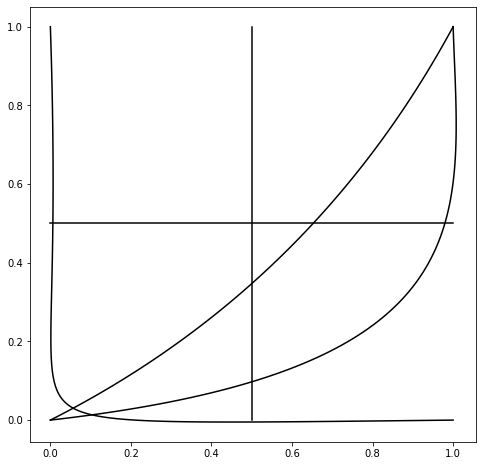

In [17]:
#all the strokes so far
strokeC0 = [[[0,0], [0.64989518, 0.33707865], [1, 1]]]
strokeC1 = [[[0, 0], [1.09574468, 0.12790698], [1.01595745, 0.50581395],[1, 1]]]
strokeC4 = [[ [0,1],[ 0.02970297, 0.08925319],[-0.03920792,0.03096539],[-0.01980198,-0.01371585],
       [0.0990099,-0.01025137],[1,0] ]]
strokeD0 = [[[0,.5], [1, .5]]]
strokeD1 = [[[.5,1], [.5, 0]]]

allStrokes = [strokeC0, strokeC1, strokeC4, strokeD0, strokeD1]
allStrokeNames = ['C0', 'C1', 'C4', 'D0', 'D1']

#just for fun plot all the strokes we have over each other
allTheStrokes = [strokeC0[0], strokeC1[0], strokeC4[0], strokeD0[0], strokeD1[0]]
fig, ax, curvePoints = plotStroke(allTheStrokes)

## Proof of concept: select a stroke of a character
Let's use the first stroke of the character below

[[423, 810], [515, 755], [545, 712]]


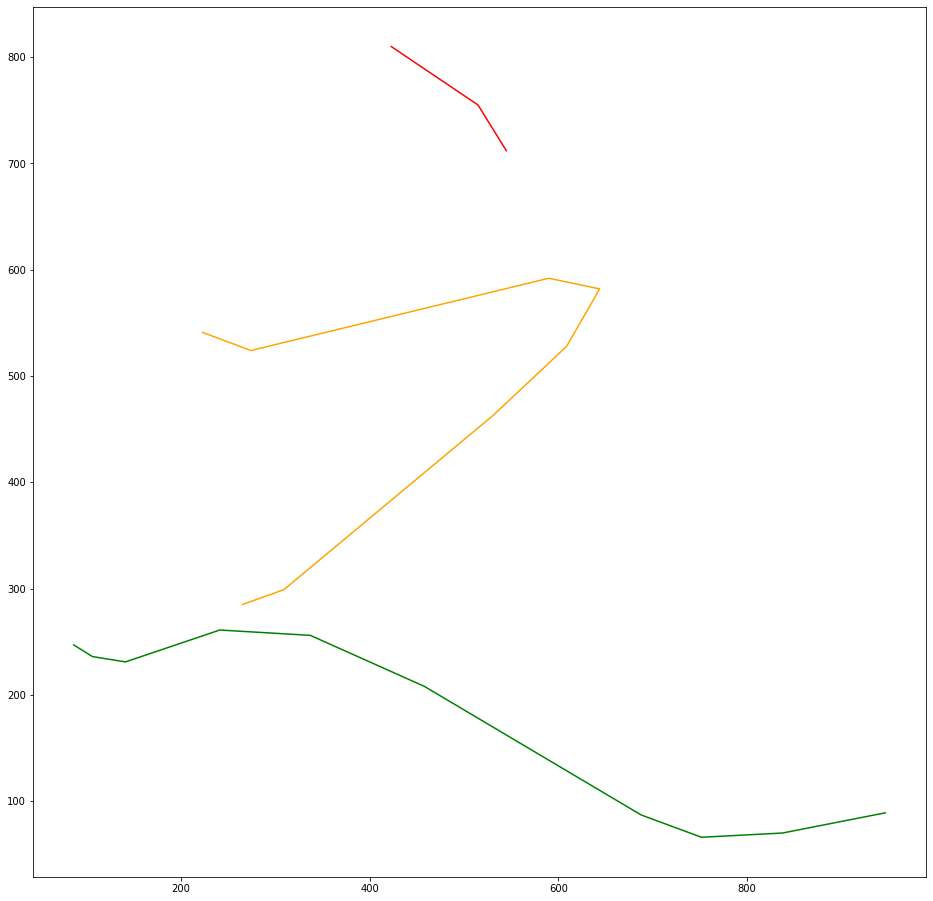

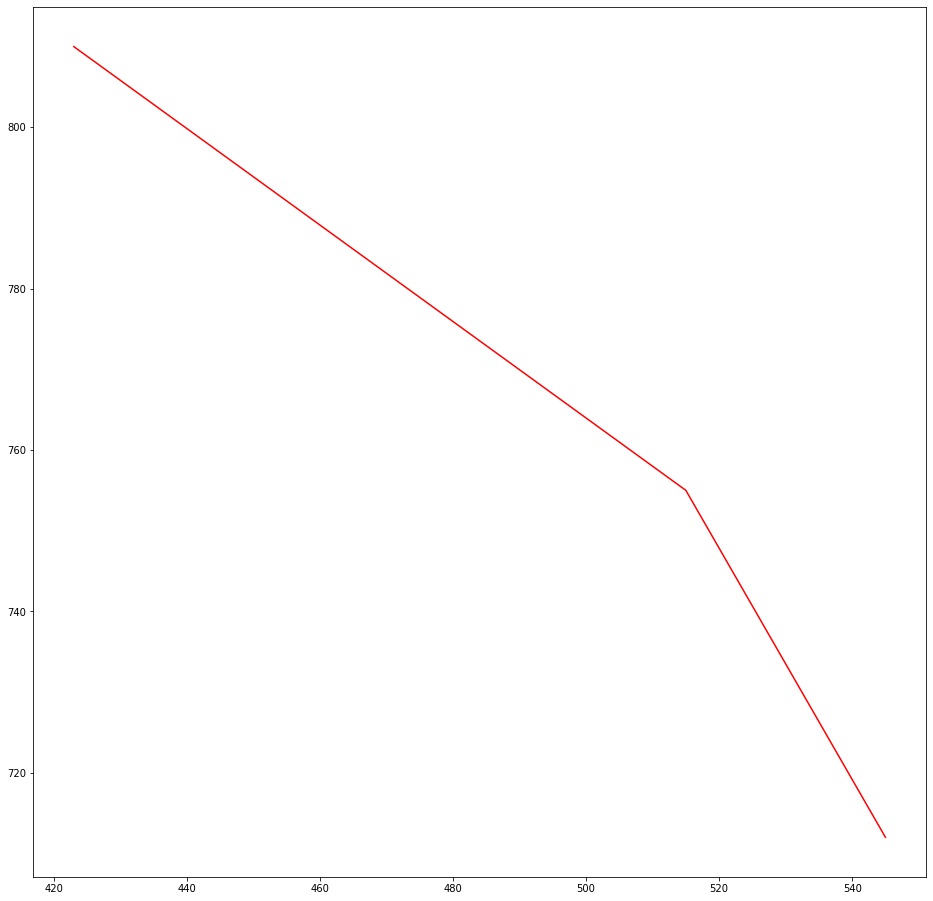

In [30]:
character = '\u4E4B' #'\u4f47'
charData = readHanziChar(character)
#print(charData)
plotHanziChar(charData)

manualStroke = charData['medians'][0]
print(manualStroke)

fig2, ax2 = plt.subplots(figsize=(16,16))
drawStroke = np.array(manualStroke)
ax2.plot(drawStroke[:,0], drawStroke[:,1], color='red')

64 328 334 786
[[[ 64.        328.       ]
  [239.4716986 482.3820217]
  [334.        786.       ]]]
[[[ 64.         328.        ]
  [359.8510636  386.58139684]
  [338.3085115  559.6627891 ]
  [334.         786.        ]]]
[[[ 64.         786.        ]
  [ 72.0198019  368.87796102]
  [ 53.4138616  342.18214862]
  [ 58.6534654  321.7181407 ]
  [ 90.732673   323.30487254]
  [334.         328.        ]]]
[[[ 64. 557.]
  [334. 557.]]]
[[[199. 786.]
  [199. 328.]]]


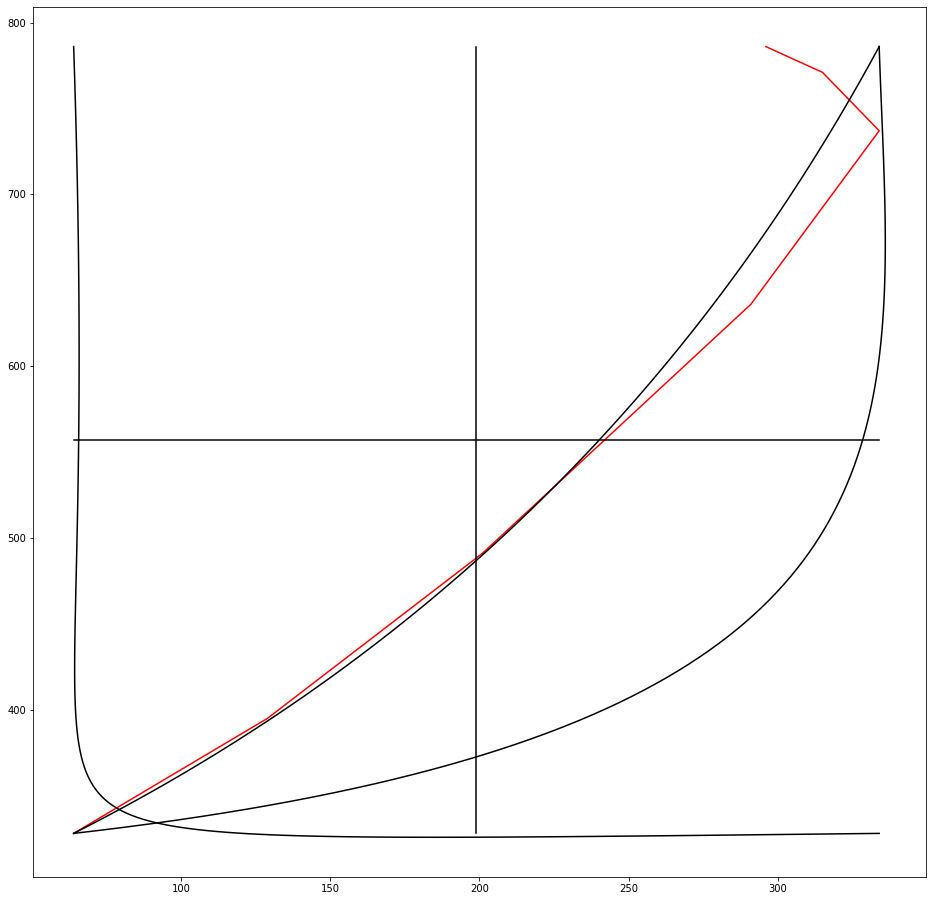

In [19]:
#just for visualizing see the strokes aligned over this one strok
fig, ax = plt.subplots(figsize=(16,16))
drawStroke = np.array(manualStroke)
ax.plot(drawStroke[:,0], drawStroke[:,1], color='red')

minX = min(drawStroke[:,0])
maxX = max(drawStroke[:,0])
minY = min(drawStroke[:,1])
maxY = max(drawStroke[:,1])
print(minX,minY,maxX,maxY)
for strokeType in allStrokes:
    strokeData = np.array(strokeType)
    strokeData[:,:,0] = minX + (strokeData[:,:,0]*(maxX-minX))
    strokeData[:,:,1] = minY + (strokeData[:,:,1]*(maxY-minY))
    print(strokeData)
    evalPoints = np.linspace(0.0, 1.0, 100) #start, end, resol, parametric t values
    for curve in strokeData: #control points, 
        nodes = np.array(curve).transpose()
        curve = bezier.Curve(nodes, degree=len(curve)-1)
        curvePoints = np.array(curve.evaluate_multi(evalPoints).transpose().tolist()) #[[x,y]...]
        ax.plot(curvePoints[:,0], curvePoints[:,1], color="black")

error: 17677.388050772548


(0.0, 800.0)

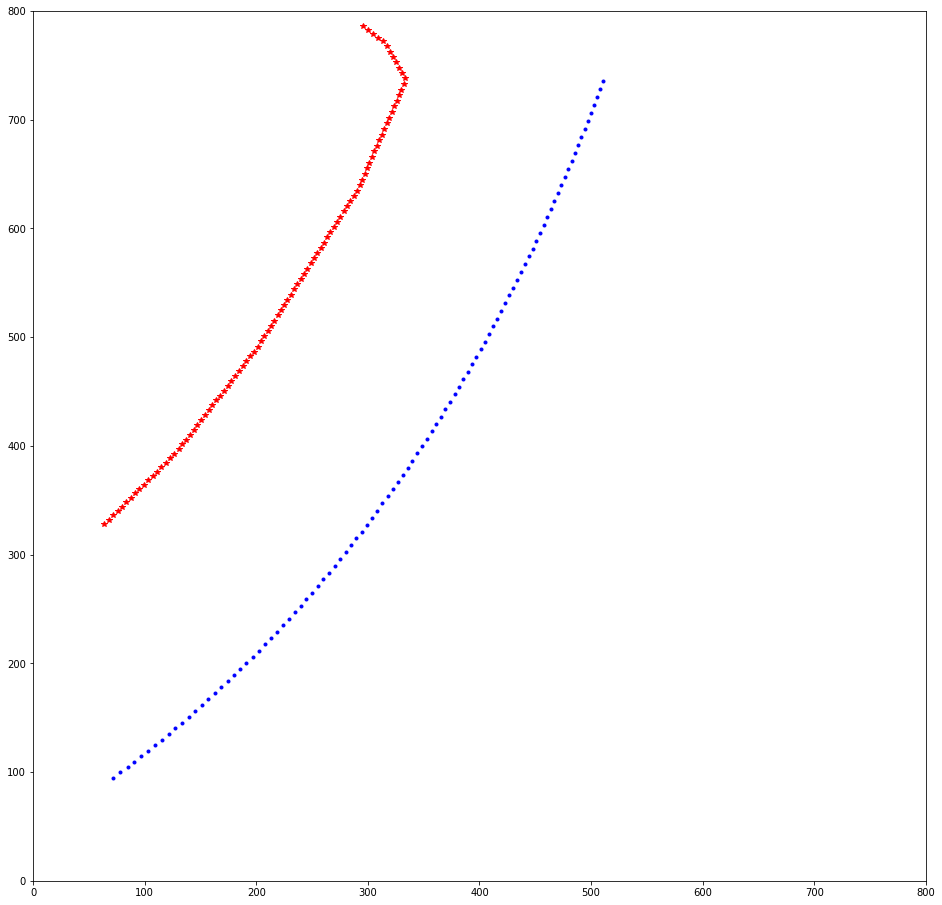

In [21]:
def pointDist(coord1, coord2): #coord = [x,y]
    return np.sqrt((coord2[1] - coord1[1])**2 + (coord2[0] - coord1[0])**2)

def getPointsHanzi(stroke, count): #get certain amount of evenly spaced points from hanzi line data
    stroke = np.array(stroke)
    totalLineDistance = 0
    incrDist = [0]
    for i in range(1, len(stroke)):
        totalLineDistance += pointDist(stroke[i-1], stroke[i])
        incrDist.append(totalLineDistance)
    segDist = (totalLineDistance / (count-1)) #-1 since we can use orgin and end as points on the line
    
    samplePoints = [stroke[0]] #start with first point
    currSeg = 0 #currSeg 0 is the first line on the graph, len(stroke)-2 is the last
    for i in range(1,count-1): #we already have the first point in, don't do the final point
        goalDist = segDist*i
        while(goalDist > incrDist[currSeg+1]): #move on to the correct segment
            currSeg += 1
        goalDist -= incrDist[currSeg] #how much further we need to go for this segment
        #figure out what frac of this segment we need to move to get our point
        fracDist = goalDist/(incrDist[currSeg+1]-incrDist[currSeg])
        samplePoints.append(stroke[currSeg] + fracDist*(stroke[currSeg+1] - stroke[currSeg]))
    samplePoints.append(stroke[-1]) #final sample point
    return np.array(samplePoints)

#bezier curves are harder so just turn them into a ton of line segments and then run the hanzi version
#note a stroke should be continuous (it shouldn't have a grap)
def getPointsBezier(stroke, count, resol=100): #get certain amount of evenly spaced points from the formal
    evalPoints = np.linspace(0.0, 1.0, resol) #start, end, resol, parametric t values
    allLinePoints = [] #each begin/end of a line segment
    for curve in stroke:
        nodes = np.array(curve).transpose()
        curve = bezier.Curve(nodes, degree=len(curve)-1)
        curvePoints = np.array(curve.evaluate_multi(evalPoints).transpose().tolist()) #[[x,y]...]
        allLinePoints.extend(curvePoints)
    return getPointsHanzi(allLinePoints, count) #we've simplified our curve to many segments

#get the error for the stroke
#each hanzi point nearest distance to formal stroke all summed
#and vice versa is the total error
def getLineErrors(hanziStroke, formalStroke, resol=200):
    hanziSample = getPointsHanzi(manualStroke, resol)
    bezierSample = getPointsBezier(formalStroke, resol, resol=100)
    
    totalError = 0
    for point in hanziSample:
        totalError += getNearestDist(point, bezierSample)
    for point in bezierSample:
        totalError += getNearestDist(point, hanziSample)
    return totalError
    
#find the nearest distance from the point to a line point
def getNearestDist(point, linePoints):
    minDist = 10e10 #arbitrary large value
    for p in linePoints:
        dist = pointDist(point, p)
        if(dist < minDist):
            minDist = dist
    return minDist
    

hanziSample = getPointsHanzi(manualStroke, 100)
bezierSample = getPointsBezier([[[72,95],[357.30398402, 311.06741465], [511,736]]], 100, resol=100)

error = getLineErrors(manualStroke, [[[72,95],[357.30398402, 311.06741465], [511,736]]], resol=50)
print("error:", error)

fig, ax = plt.subplots(figsize=(16,16))
ax.plot(hanziSample[:,0], hanziSample[:,1], 'r*')
ax.plot(bezierSample[:,0], bezierSample[:,1], 'b.')

ax.set_ylim([0,800])
ax.set_xlim([0,800])

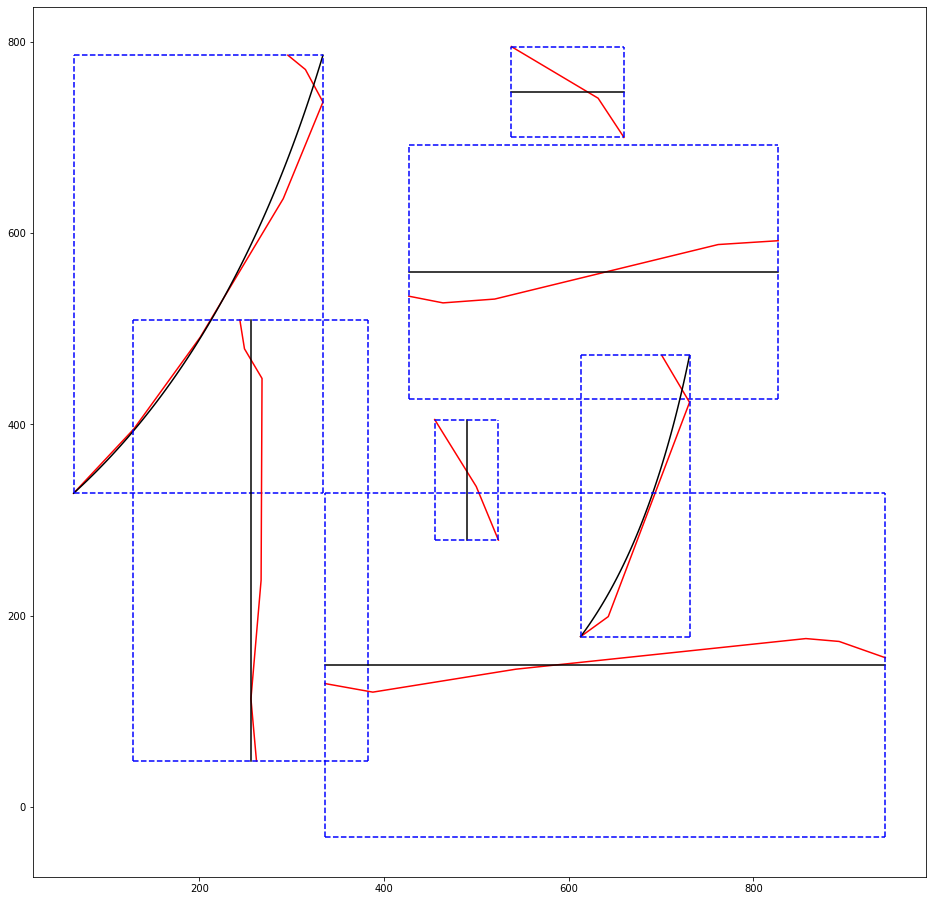

In [28]:
#just for visualizing see the strokes aligned over this one strok
fig, ax = plt.subplots(figsize=(16,16))

for manualStroke in charData['medians']: #guess correct stroke for each manual stroke
    manualStroke = np.array(manualStroke)
    ax.plot(manualStroke[:,0], manualStroke[:,1], color='red')

    minX = min(manualStroke[:,0])
    maxX = max(manualStroke[:,0])
    minY = min(manualStroke[:,1])
    maxY = max(manualStroke[:,1])
    #if window is really narrow miden this, as it is clearly a horizontal or vertical line
    if((maxX - minX) < .25*(maxY - minY)): #4:1 aspect ratio, widen the x dir, make at least #4:3
        maxX += .25*(maxY - minY) 
        minX -= .25*(maxY - minY) 
    if((maxY - minY) < .25*(maxX - minX)): #4:1 aspect ratio, widen the y dir, make at least #4:3
        maxY += .25*(maxX - minX) 
        minY -= .25*(maxX - minX) 

    #print(minX,minY,maxX,maxY)
    #ax.set_ylim([minY,maxY])
    #ax.set_xlim([minX,maxX])

    bestStroke = [[[0,0]]] #default val
    bestError = 10e20 #arbitrary large value
    for strokeType in allStrokes:
        strokeData = np.array(strokeType)
        strokeData[:,:,0] = minX + (strokeData[:,:,0]*(maxX-minX))
        strokeData[:,:,1] = minY + (strokeData[:,:,1]*(maxY-minY))

        #now we compare manualStroke and the strokeData
        distError = getLineErrors(manualStroke, strokeData, resol=100)
        if(distError < bestError): #new best
            bestError = distError
            bestStroke = strokeData
        #print(distError)

    #we have found best stroke, graph it
    for curve in bestStroke: #control points, 
            nodes = np.array(curve).transpose()
            curve = bezier.Curve(nodes, degree=len(curve)-1)
            curvePoints = np.array(curve.evaluate_multi(evalPoints).transpose().tolist()) #[[x,y]...]
            ax.plot(curvePoints[:,0], curvePoints[:,1], color="black")
            
            #plot the border box too
            ax.plot([minX,minX],[minY,maxY], linestyle="dashed", color="blue")
            ax.plot([maxX,maxX],[minY,maxY], linestyle="dashed", color="blue")
            ax.plot([minX,maxX],[maxY,maxY], linestyle="dashed", color="blue")
            ax.plot([minX,maxX],[minY,minY], linestyle="dashed", color="blue")

In [24]:
print(bestStroke)

[[[336. 148.]
  [943. 148.]]]
